In [1]:
#Install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 6.6 MB/s eta 0:00:00


In [2]:
#Import Library
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob

In [3]:
#Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Import Dataset
images_path = '/content/drive/MyDrive/colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path  = '/content/drive/MyDrive/colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = '/content/drive/MyDrive/colorful_fashion_dataset_for_object_detection/'

In [5]:
#Uji Coba Yolo
from ultralytics import YOLO

detection_model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 241MB/s]



100%|██████████| 151k/151k [00:00<00:00, 6.99MB/s]
image 1/1 /content/GRdCC.jpg: 448x640 1 person, 1 bicycle, 5 cars, 1 truck, 99.6ms
Speed: 12.9ms preprocess, 99.6ms inference, 37.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


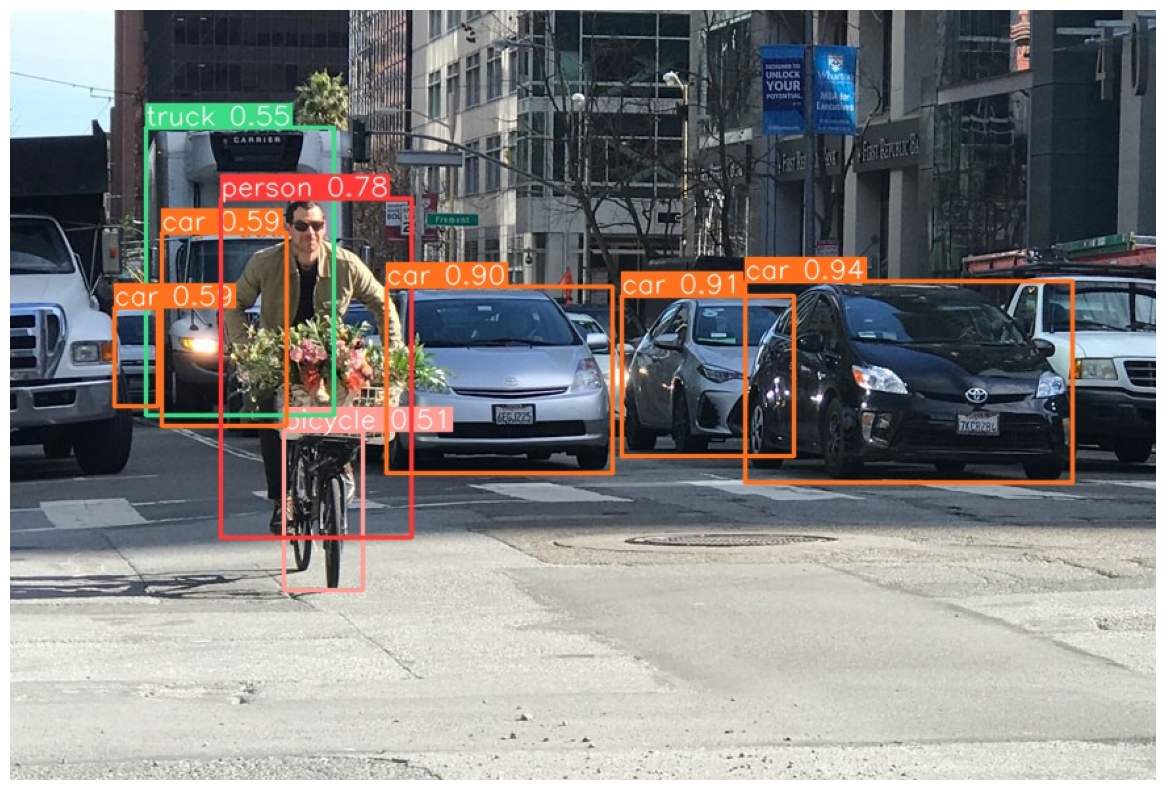

In [6]:
#Coba sebarang gambar
img = random.choice(os.listdir(images_path))

i=detection_model.predict(source='https://i.stack.imgur.com/GRdCC.jpg', conf=0.5, save=True)

im = plt.imread('/content/runs/detect/predict/GRdCC.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(im)

In [7]:
#Plot data dengan Anotasi
## Pendefinisian Fungsi
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)

    return (box)

def plot_annotations(img, filename):
    with open(annotations_path+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])

            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0])),int(round(bb[2]))),(int(round(bb[1])),int(round(bb[3]))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

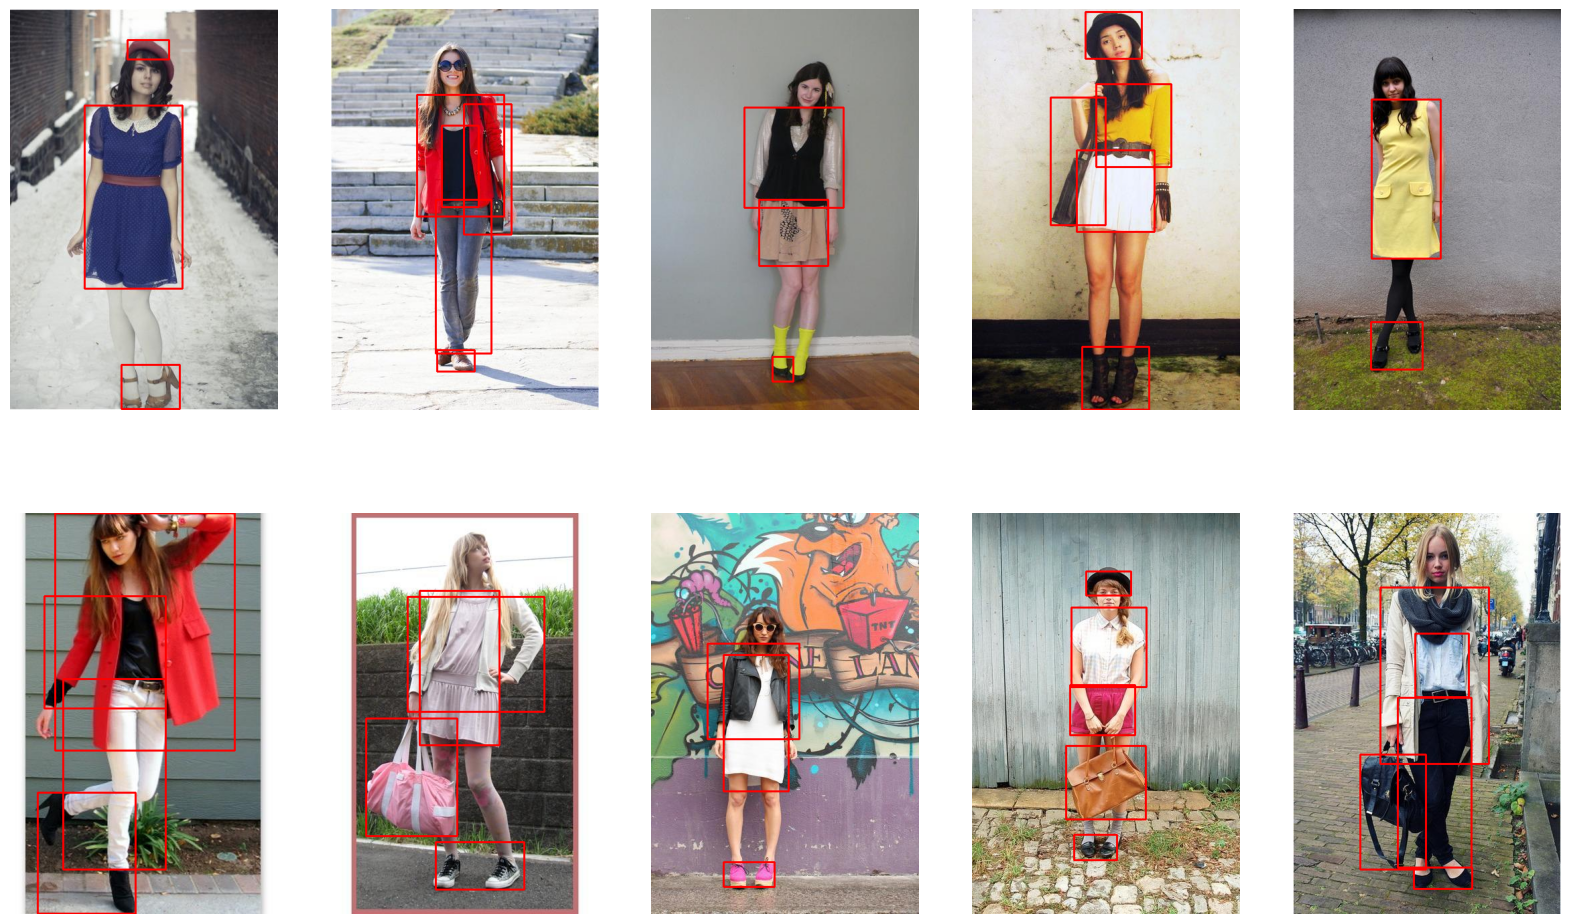

In [8]:
#Plot data dengan anotasi
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(20,12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(images_path+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

In [9]:
#Prepare Dataset
train = []
with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [10]:
len(train), len(test)

(2145, 537)

In [11]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [12]:
train_path = '/content/train/'
test_path = '/content/test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████| 2145/2145 [12:34<00:00,  2.84it/s]


Copying Test Data..!!


100%|██████████| 537/537 [03:02<00:00,  2.94it/s]


In [13]:
text = """
train: /content/train
val: /content/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.

image 1/1 /content/drive/MyDrive/colorful_fashion_dataset_for_object_detection/JPEGImages/6385.jpg: 640x448 5 persons, 1 handbag, 38.1ms
Speed: 8.8ms preprocess, 38.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.

image 1/1 /content/drive/MyDrive/colorful_fashion_dataset_for_object_detection/JPEGImages/44905.jpg: 640x448 1 person, 1 handbag, 30.4ms
Speed: 2.4ms preprocess, 30.4ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.

image 1/1 /content/drive/MyDrive/colorful_fashion_dataset_for_

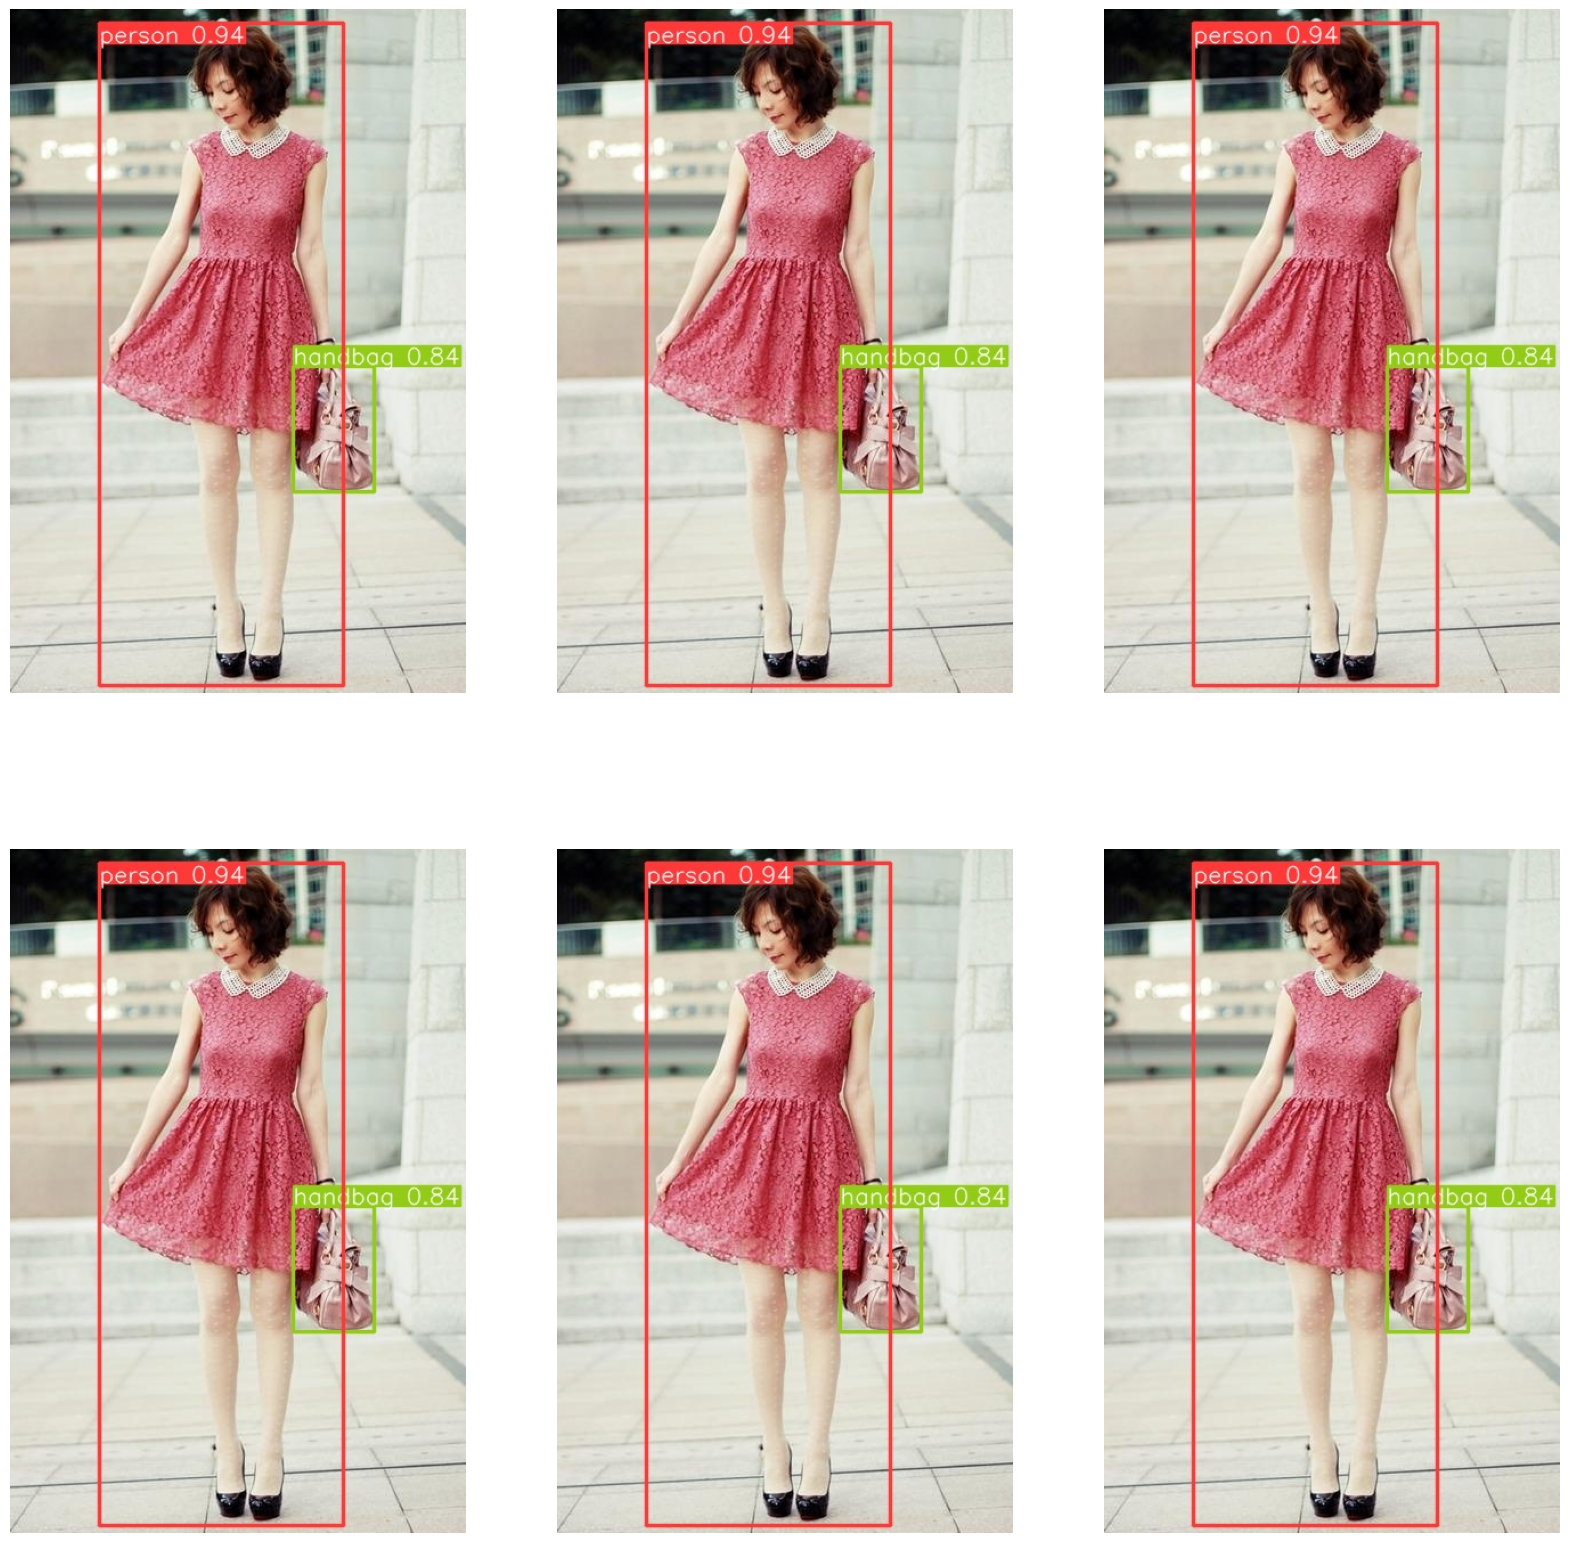

In [16]:
# choose random image from dataset
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 6)
c=1
for img in imgs:
    i=detection_model.predict(source=images_path +img, conf=0.4, save=True, line_thickness=2)

    im = plt.imread('/content/runs/detect/predict/188983.jpg')
    plt.subplot(2,3,c)
    plt.axis('off')
    plt.imshow(im)
    c+=1